## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

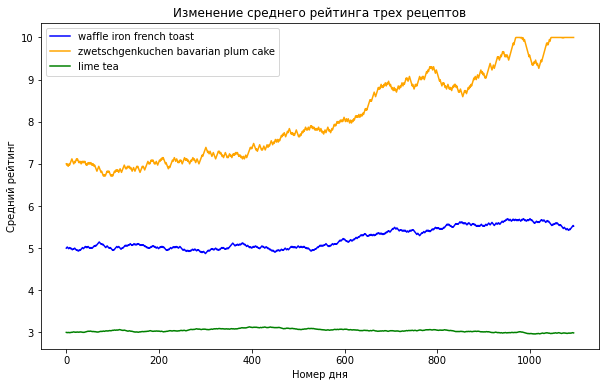

In [3]:
data = np.load("data/average_ratings.npy")

recipes = ['waffle iron french toast', 'zwetschgenkuchen bavarian plum cake', 'lime tea']
colors = ['blue', 'orange', 'green']
plt.figure(figsize=(10, 6))
for i, recipe in enumerate(recipes):
    plt.plot(data[i], color=colors[i], label=recipe)

# Добавляем подписи осей и заголовок
plt.xlabel('Номер дня')
plt.ylabel('Средний рейтинг')
plt.title('Изменение среднего рейтинга трех рецептов')

plt.legend()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


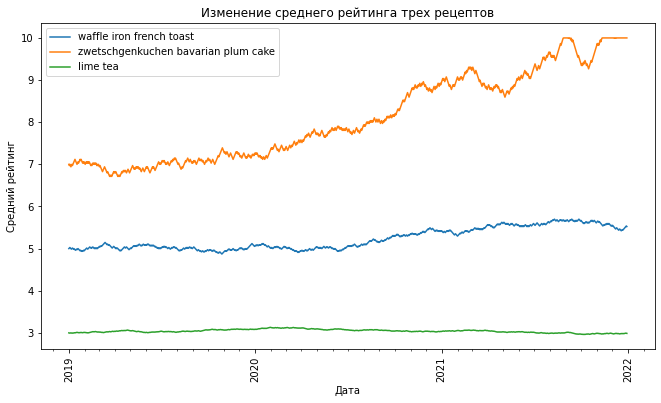

In [4]:
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

date_index = pd.date_range(start='2019-01-01', end='2021-12-30', freq='D')

fig, ax = plt.subplots()
fig.set_size_inches(11, 6)

ax.plot(date_index, data[0], label='waffle iron french toast')
ax.plot(date_index, data[1], label='zwetschgenkuchen bavarian plum cake')
ax.plot(date_index, data[2], label='lime tea')

ax.set_xlabel('Дата')
ax.set_ylabel('Средний рейтинг')

ax.set_title('Изменение среднего рейтинга трех рецептов')

years = YearLocator()
months = MonthLocator()
date_formatter = DateFormatter('%Y')

ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_formatter(date_formatter)

plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

ax.legend()

plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

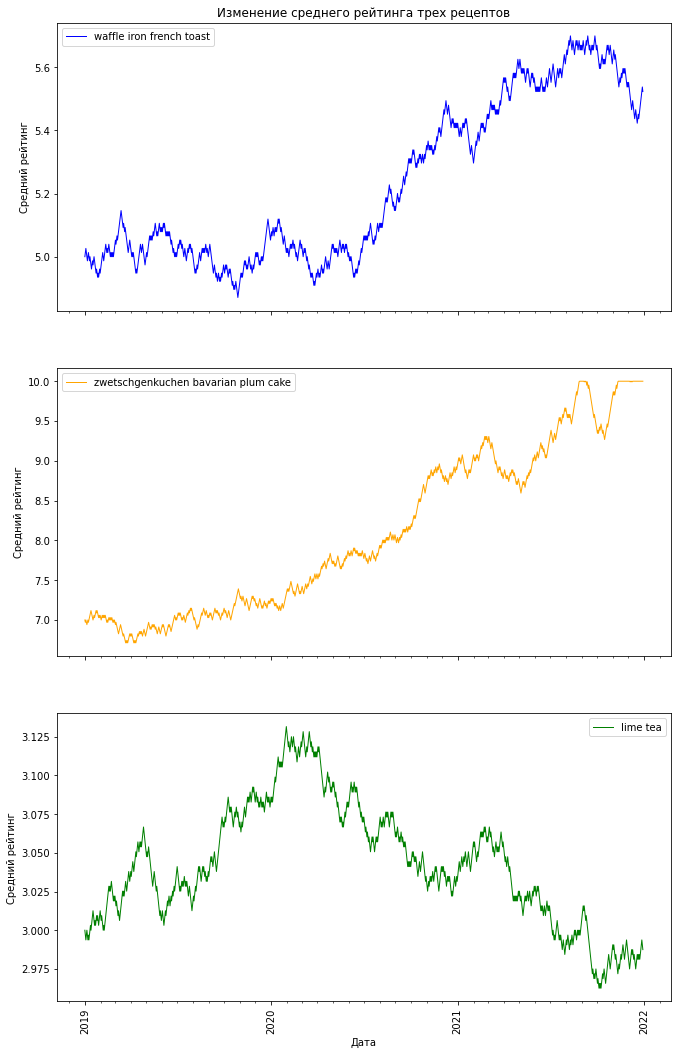

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(11, 18))

axes[0].plot(date_index, data[0], label='waffle iron french toast', color = 'blue', linewidth=1)
axes[1].plot(date_index, data[1], label='zwetschgenkuchen bavarian plum cake', color = 'orange', linewidth=1)
axes[2].plot(date_index, data[2], label='lime tea', color = 'green', linewidth=1)

years = YearLocator()
months = MonthLocator()
date_formatter = DateFormatter('%Y')

axes[2].xaxis.set_major_locator(years)
axes[2].xaxis.set_minor_locator(months)
axes[2].xaxis.set_major_formatter(date_formatter)

plt.setp(axes[2].xaxis.get_majorticklabels(), rotation=90)

axes[0].set_ylabel('Средний рейтинг')
axes[1].set_ylabel('Средний рейтинг')
axes[2].set_ylabel('Средний рейтинг')

axes[2].set_xlabel('Дата')
axes[0].set_title('Изменение среднего рейтинга трех рецептов')

axes[0].legend()
axes[1].legend()
axes[2].legend()

plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


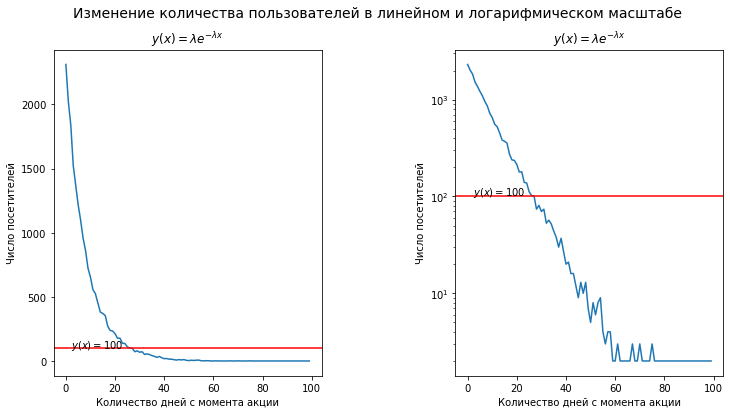

In [6]:
data_visitors = np.load("data/visitors.npy")

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.plot(data_visitors)
plt.title(r'$y(x) = \lambda e^{-\lambda x}$')
plt.xlabel('Количество дней с момента акции')
plt.ylabel('Число посетителей')
plt.axhline(y=100, color='r', linestyle='-')
plt.text(2, 102, r'$y(x) = 100$')

# Логарифмический масштаб
plt.subplot(1, 2, 2)
plt.semilogy(data_visitors)
plt.title(r'$y(x) = \lambda e^{-\lambda x}$')
plt.xlabel('Количество дней с момента акции')
plt.ylabel('Число посетителей')
plt.axhline(y=100, color='r', linestyle='-')
plt.text(2, 102, r'$y(x) = 100$')
plt.subplots_adjust(wspace=0.5)

plt.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе', fontsize=14)

plt.show()

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [41]:
reviews = pd.read_csv("data/reviews_sample.csv", sep=',', engine="python", index_col=[0], parse_dates = ['date'])
recipes = pd.read_csv("data/recipes_sample.csv", sep=',')
recipes

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN
29998,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

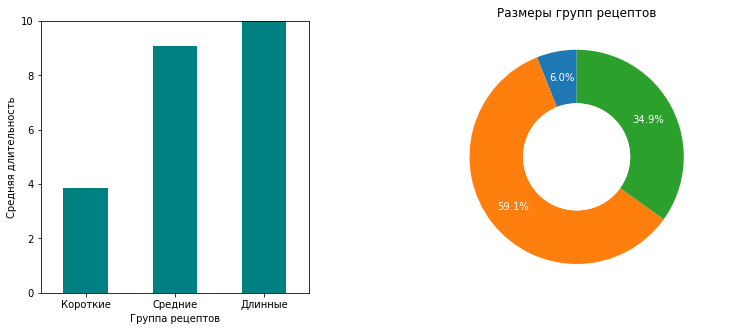

In [36]:
recipes['recipe_length'] = pd.cut(recipes['minutes'], [0, 5, 50, float('inf')], labels=['Короткие', 'Средние', 'Длинные'])

grouped_recipes = recipes.groupby('recipe_length').agg({'n_steps': 'mean', 'id': 'count'})

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

grouped_recipes['n_steps'].plot(kind='bar', rot=0, color='teal', ax=axs[0])
axs[0].set_xlabel('Группа рецептов')
axs[0].set_ylabel('Средняя длительность')
axs[0].set_ylim(0, 10)

grouped_recipes['id'].plot(kind='pie', autopct='%1.1f%%', pctdistance=0.75, wedgeprops=dict(width=0.5), startangle=90, textprops=dict(color='w'), ax=axs[1])
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig.gca().add_artist(centre_circle)
axs[1].set_title('Размеры групп рецептов')
axs[1].set_ylabel('')

plt.subplots_adjust(wspace=0.5, hspace=0)

plt.show()

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

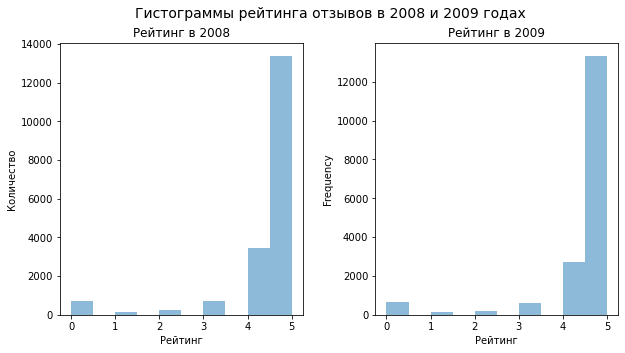

In [55]:
reviews = reviews[(reviews['date'].dt.year == 2008) | (reviews['date'].dt.year == 2009)]

merged_data = pd.merge(recipes, reviews, left_on='id', right_on='recipe_id')

data_2008 = merged_data[merged_data['date'].dt.year == 2008]
data_2009 = merged_data[merged_data['date'].dt.year == 2009]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
data_2008['rating'].plot.hist(alpha=0.5, bins=10, ax=axs[0])
data_2009['rating'].plot.hist(alpha=0.5, bins=10, ax=axs[1])

axs[0].set_xlabel('Рейтинг')
axs[1].set_xlabel('Рейтинг')
axs[0].set_ylabel('Количество')
axs[0].set_title('Рейтинг в 2008')
axs[1].set_title('Рейтинг в 2009')
fig.subplots_adjust(wspace=0.3) 
fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах', fontsize=14)
plt.show()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

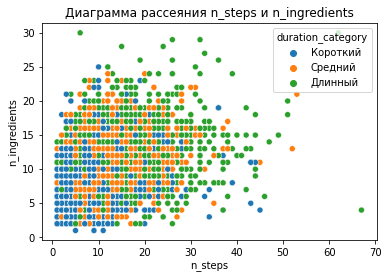

In [56]:
recipes['duration_category'] = pd.cut(recipes['minutes'], bins=[0, 30, 60, 1000000], labels=['Короткий', 'Средний', 'Длинный'])

sns.scatterplot(x='n_steps', y='n_ingredients', hue='duration_category', data=recipes)

plt.title('Диаграмма рассеяния n_steps и n_ingredients')

plt.show()

In [58]:
 #Визуально линейная зависимость между переменными n_steps и n_ingredients пронаблюдать сложно, но в целом логика следующая: 
#чем больше переменная n_steps, тем скорее всег будет больше и n_ingredients, и наоборот

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

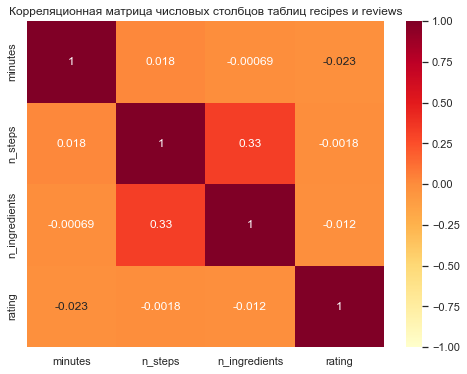

In [67]:
mergeddf = pd.merge(recipes, reviews, left_on='id', right_on='recipe_id')
corrmatrix = mergeddf[['minutes', 'n_steps', 'n_ingredients', 'rating']].corr()

sns.set_style("whitegrid") 
sns.set()

plt.figure(figsize=(8, 6))
sns.heatmap(corrmatrix, annot=True, cmap="YlOrRd", vmin=-1, vmax=1)
plt.title("Корреляционная матрица числовых столбцов таблиц recipes и reviews")
plt.show()